In [47]:
%matplotlib notebook
import pandas as pd
#from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [48]:
country_data = "/Users/shilpa/Desktop/Boringppl_project/WasteManagement/Data/country_level_data_0.csv"
country_data_df = pd.read_csv(country_data, encoding = 'utf-8')
country_data_df.head(1)


,iso3c,region_id,country_name,income_id,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,...,waste_treatment_controlled_landfill_percent,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent,where_where_is_this_data_measured
0,ABW,LCN,Aruba,HIC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11.0,NaN,89.0,NaN,NaN


In [49]:
Total_MSW = country_data_df[['country_name', 
                       'income_id', 
                       'gdp', 
                       'population_population_number_of_people', 
                       'total_msw_total_msw_generated_tons_year']]
Total_MSW.fillna(0).set_index('country_name').head(3)

,income_id,gdp,population_population_number_of_people,total_msw_total_msw_generated_tons_year
country_name,,,,
Aruba,HIC,0.000000e+00,103187.0,8.813202e+04
Afghanistan,LIC,2.141361e+10,34656032.0,5.628525e+06
Angola,LMC,1.030423e+11,25096150.0,4.213644e+06


In [50]:
# rate of MSW generation per day = total_msw_total_msw_generated_tons_year / 365

#MSW['rate_per_day_kgs'] = MSW['total_msw_total_msw_generated_tons_year'] / 365
Total_MSW['msw_per_day'] =  Total_MSW['total_msw_total_msw_generated_tons_year'] / 365
Total_MSW['msw_per_day_per_person'] =  Total_MSW['total_msw_total_msw_generated_tons_year'] / Total_MSW["population_population_number_of_people"]


<ipython-input-50-5a3af2df02d8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  Total_MSW['msw_per_day'] =  Total_MSW['total_msw_total_msw_generated_tons_year'] / 365
<ipython-input-50-5a3af2df02d8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  Total_MSW['msw_per_day_per_person'] =  Total_MSW['total_msw_total_msw_generated_tons_year'] / Total_MSW["population_population_number_of_people"]


In [51]:
#Total_MSW['default_rank'] = Total_MSW['msw_per_day_per_person'].rank(ascending = True)
Total_MSW['default_rank'] = Total_MSW['msw_per_day_per_person']
Total_MSW

<ipython-input-51-84ab0299c7d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  Total_MSW['default_rank'] = Total_MSW['msw_per_day_per_person']


,country_name,income_id,gdp,population_population_number_of_people,total_msw_total_msw_generated_tons_year,msw_per_day,msw_per_day_per_person,default_rank
0,Aruba,HIC,NaN,1.031870e+05,8.813202e+04,241.457580,0.854100,0.854100
1,Afghanistan,LIC,2.141361e+10,3.465603e+07,5.628525e+06,15420.617452,0.162411,0.162411
2,Angola,LMC,1.030423e+11,2.509615e+07,4.213644e+06,11544.229000,0.167900,0.167900
3,Albania,UMC,1.347108e+10,2.880703e+06,1.142964e+06,3131.408219,0.396766,0.396766
4,Andorra,HIC,3.319880e+09,8.243100e+04,4.300000e+04,117.808219,0.521648,0.521648
5,United Arab Emirates,HIC,3.842225e+11,9.269612e+06,5.413453e+06,14831.379200,0.584000,0.584000
6,Argentina,HIC,4.475178e+11,4.298152e+07,1.791055e+07,49070.000000,0.416704,0.416704
7,Armenia,UMC,1.150200e+10,2.906220e+06,4.928000e+05,1350.136986,0.169567,0.169567
8,American Samoa,UMC,5.345551e+08,5.559900e+04,1.898949e+04,52.026000,0.341544,0.341544
9,Antigua and Barbuda,HIC,1.344374e+09,9.677700e+04,3.058500e+04,83.794521,0.316036,0.316036


In [52]:
df_world = Total_MSW
df_world.fillna(0)

,country_name,income_id,gdp,population_population_number_of_people,total_msw_total_msw_generated_tons_year,msw_per_day,msw_per_day_per_person,default_rank
0,Aruba,HIC,0.000000e+00,1.031870e+05,8.813202e+04,241.457580,0.854100,0.854100
1,Afghanistan,LIC,2.141361e+10,3.465603e+07,5.628525e+06,15420.617452,0.162411,0.162411
2,Angola,LMC,1.030423e+11,2.509615e+07,4.213644e+06,11544.229000,0.167900,0.167900
3,Albania,UMC,1.347108e+10,2.880703e+06,1.142964e+06,3131.408219,0.396766,0.396766
4,Andorra,HIC,3.319880e+09,8.243100e+04,4.300000e+04,117.808219,0.521648,0.521648
5,United Arab Emirates,HIC,3.842225e+11,9.269612e+06,5.413453e+06,14831.379200,0.584000,0.584000
6,Argentina,HIC,4.475178e+11,4.298152e+07,1.791055e+07,49070.000000,0.416704,0.416704
7,Armenia,UMC,1.150200e+10,2.906220e+06,4.928000e+05,1350.136986,0.169567,0.169567
8,American Samoa,UMC,5.345551e+08,5.559900e+04,1.898949e+04,52.026000,0.341544,0.341544
9,Antigua and Barbuda,HIC,1.344374e+09,9.677700e+04,3.058500e+04,83.794521,0.316036,0.316036


<IPython.core.display.Javascript object>


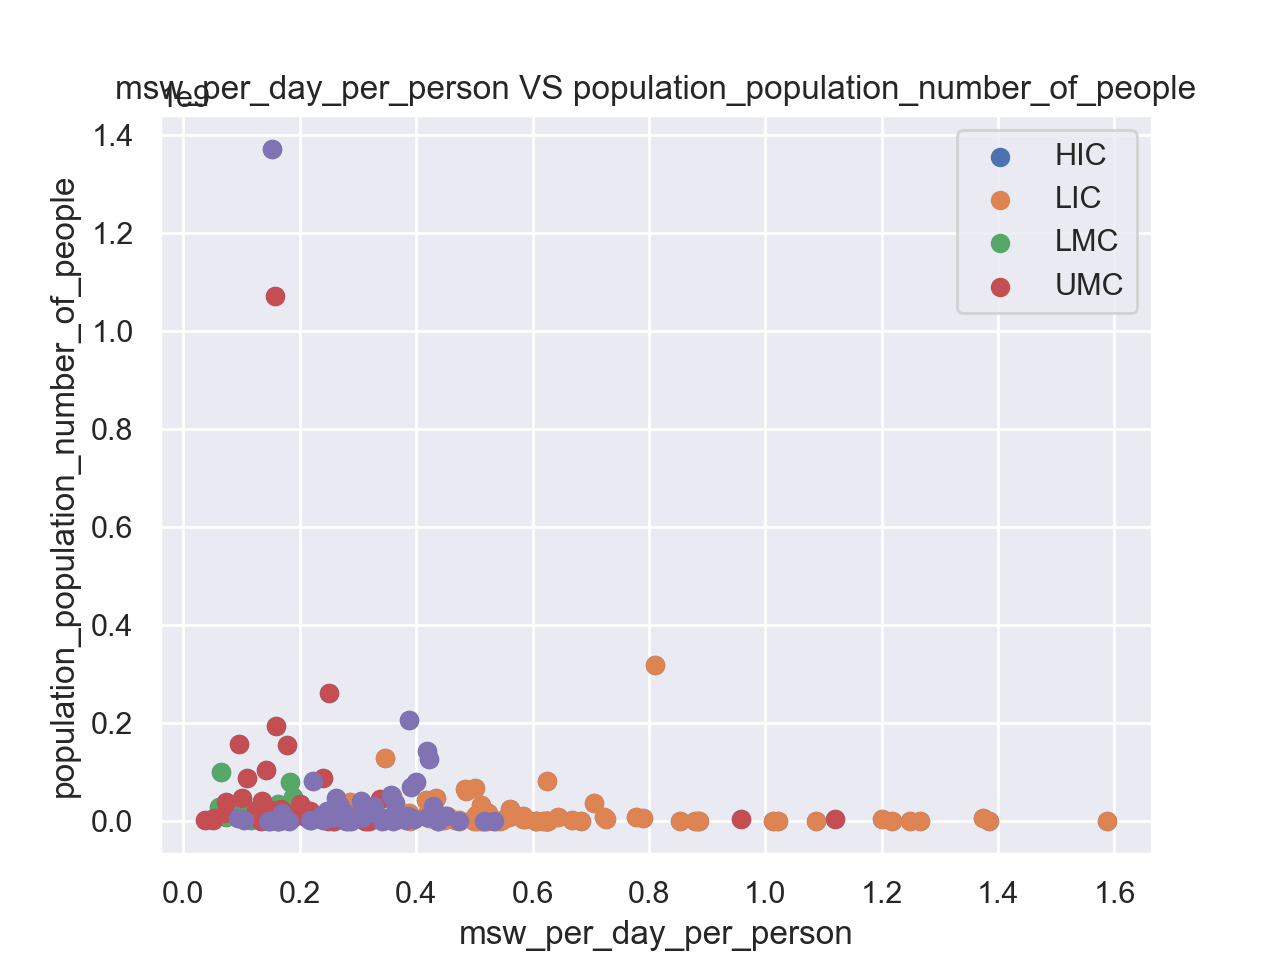

In [65]:
plt.scatter(df_world['msw_per_day_per_person'],df_world['population_population_number_of_people'])
groups=df_world.groupby('income_id')
for name, group in groups:
    plt.scatter(group['msw_per_day_per_person'],group['population_population_number_of_people'])
    plt.legend(df_world['income_id'].unique())
    plt.xlabel('msw_per_day_per_person')
    plt.ylabel('population_population_number_of_people')
    plt.title('msw_per_day_per_person VS population_population_number_of_people')


<ipython-input-32-a6bdf0a536f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_world['mpg_z'] = (x - x.mean())/x.std()
<ipython-input-32-a6bdf0a536f1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_world['colors'] = ['green' if x < 0.0 else 'red' for x in df_world['mpg_z']]
<ipython-input-32-a6bdf0a536f1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_world.s

<IPython.core.display.Javascript object>


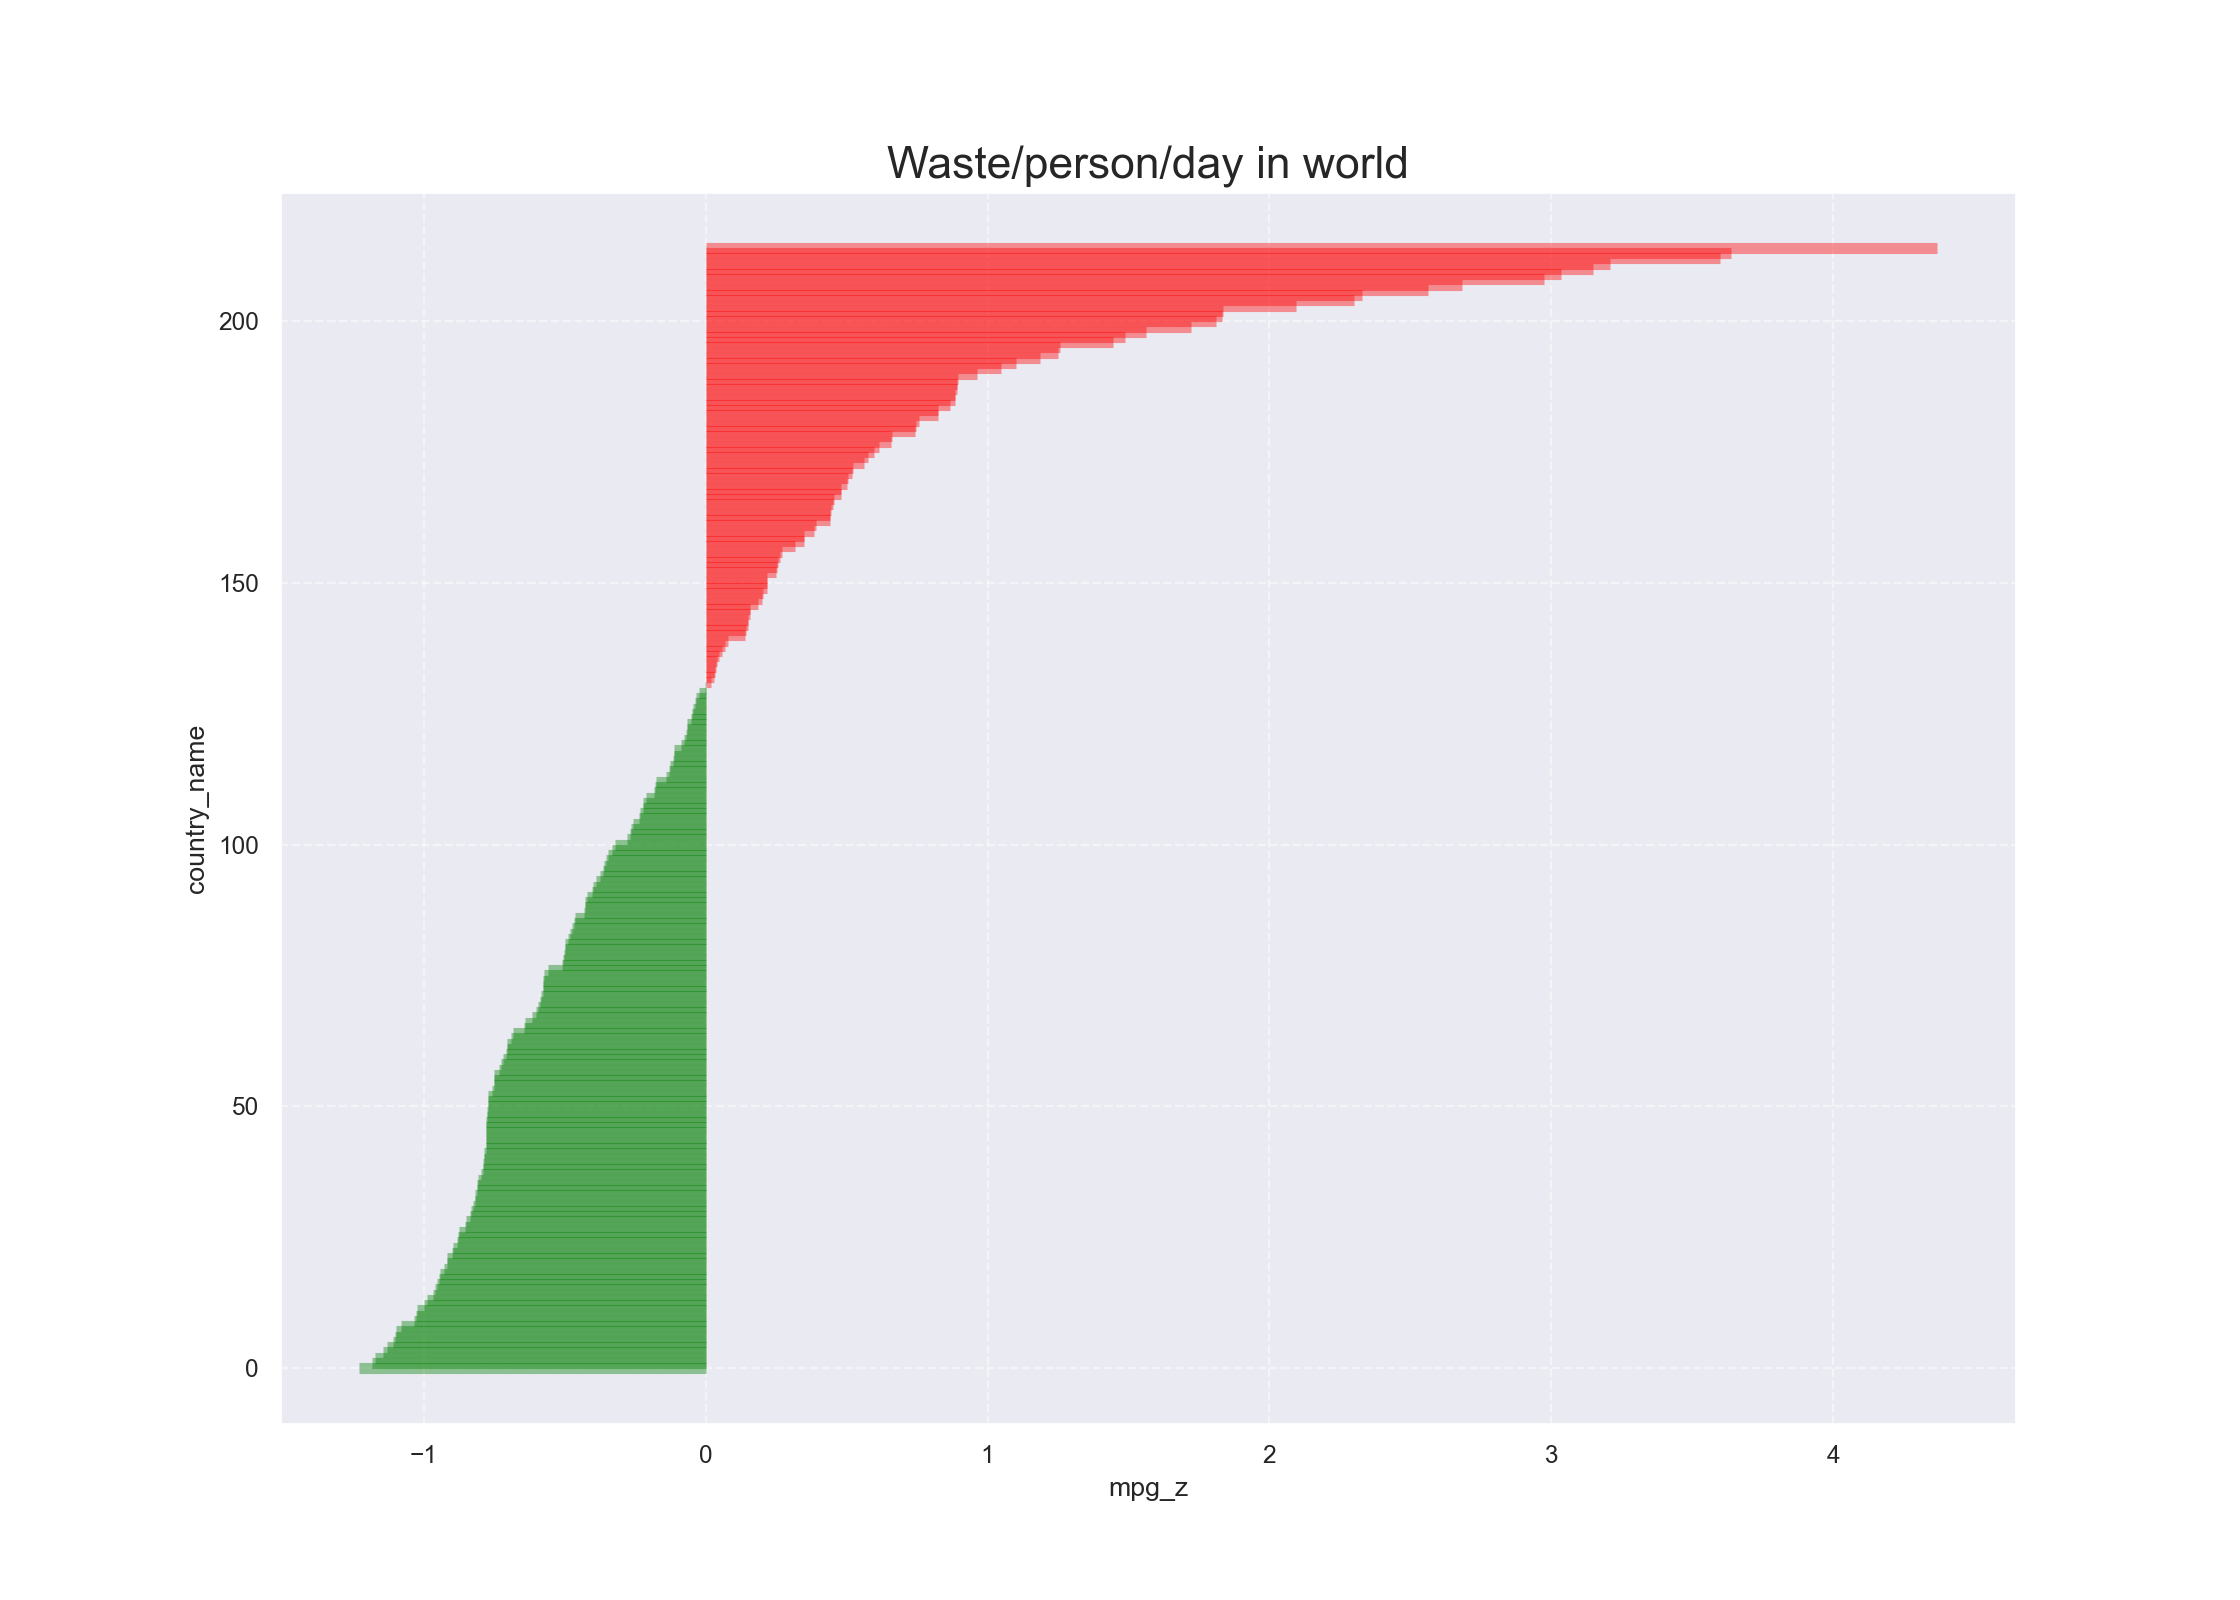

In [32]:
x = df_world.loc[:, ['msw_per_day_per_person']]
df_world['mpg_z'] = (x - x.mean())/x.std()
df_world['colors'] = ['green' if x < 0.0 else 'red' for x in df_world['mpg_z']]
df_world.sort_values('mpg_z', inplace=True)
df_world#.reset_index(inplace=True)

plt.figure(figsize=(14,10), dpi= 80)
plt.hlines(y=df_world.index, xmin=0, xmax=df_world.mpg_z, color=df_world.colors, alpha=0.4, linewidth=5)

# #Decorations
plt.gca().set(ylabel='country_name', xlabel='mpg_z')
#plt.yticks(df_world.country_name, fontsize=5)
plt.title('Waste/person/day in world', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()


